In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

### Data Load

In [19]:
X, y = load_iris(return_X_y=True,as_frame=True)

### Data Analysis

In [20]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


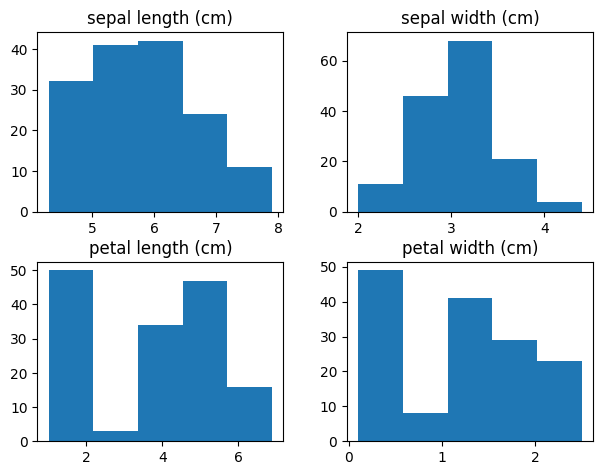

In [21]:
fig,axs = plt.subplots(2,2)
axs = [level2 for level1 in axs for level2 in level1]
fig.tight_layout(pad=1.5)
for idx,ax in enumerate(axs):
    ax.hist(X.iloc[:,idx:idx+1],bins=5)
    ax.set_title(X.columns[idx])
plt.show()

### Model and Param Grid

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model_params = {
    'svm':{
        'model':SVC()
        ,'params':{
        'C':[10,25,50,80]
        ,'kernel':['rbf','sigmoid']
        ,'gamma':['scale','auto']
        ,'max_iter':[50,100,150,200,250,300]
    }
    }
    ,'randomforest':{
        'model':RandomForestClassifier()
        ,'params':{'n_estimators':[25,50,75,100]
        ,'criterion':['gini','log-loss']
        ,'max_depth':[15,20,25,30]
    }
    }
    ,'LogisticRegression':{
        'model':LogisticRegression()
        ,'params':{
        'solver':('newton-cg','lbfgs'),'max_iter':(120,150)
    }
    }
}
# model_params

In [23]:
def chooseBestModel(model_params,X,y):
    from sklearn.model_selection import GridSearchCV
    model_scores=[]
    cv = 3
    for key,value in model_params.items():
        clf = GridSearchCV(value['model'],param_grid=value['params'],cv=cv)
        clf.fit(X,y)
        model_scores.append({
            'model':key
            ,'best_score':clf.best_score_
            ,'best_params':clf.best_params_
        })
    return model_scores


In [36]:
df_model_scores = pd.DataFrame(chooseBestModel(model_params,X,y))

In [25]:
df_model_scores

,model,best_score,best_params
0,svm,0.980000,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'm..."
1,randomforest,0.966667,"{'criterion': 'gini', 'max_depth': 15, 'n_esti..."
2,LogisticRegression,0.973333,"{'max_iter': 120, 'solver': 'newton-cg'}"


### Shuffling Data to see results otherwise

In [35]:
from sklearn.utils import shuffle
X_shuffle = shuffle(X,random_state=18)
y_shuffle = shuffle(y,random_state=18)
df_model_scores_shuffle = pd.DataFrame(chooseBestModel(model_params,X_shuffle,y_shuffle))


In [27]:
df_model_scores_shuffle

,model,best_score,best_params
0,svm,0.986667,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', '..."
1,randomforest,0.966667,"{'criterion': 'gini', 'max_depth': 20, 'n_esti..."
2,LogisticRegression,0.953333,"{'max_iter': 120, 'solver': 'newton-cg'}"


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=18)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(112, 4) (38, 4) (112,) (38,)


In [29]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_recall_curve,precision_score,recall_score
def metrics(y_test,y_pred,average='weighted'):
    return {'accuracy_score':accuracy_score(y_test,y_pred)
            ,'precision_score':precision_score(y_test,y_pred,average=average)
            ,'recall_score':recall_score(y_test,y_pred,average=average)
            ,'f1_score':f1_score(y_test,y_pred,average=average)
    }

### Using SVM to build Model and Predict unseen data

In [32]:
print(df_model_scores['best_params'][0],df_model_scores_shuffle['best_params'][0])

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 50} {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 50}


In [37]:
clf = SVC(C=10,kernel='rbf',gamma='scale',max_iter=50)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
metrics(y_test,y_pred)

[[13  0  0]
 [ 0 10  0]
 [ 0  0 15]]


{'accuracy_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0}